<div style="background-color: #A9907E !important; color: white; min-height: 5px; padding: 5px; margin: auto; font-size : 40px; font-family:serif;">
  <p><strong>Presentasi Progres Magang Software I :</strong></p>
</div>

<div style="background-color: #675D50; color:#F3E8FF; padding: 10px ">
    <p><strong>Oleh:</strong></p>
    <ul>
        <li>Eka Akbar Permatasari</li>
        <li>Muhammad Arjuna Wirakusuma</li>
    </ul>
</div>

# FDSN-Mass Downloader
## Rectangular Selection

obspy.clients.fdsn package contains a client to acces web servers that implement the FDSN web service definitions. Here are the step for downloading the seismic data:

1. specify the geographical region from which to download data;
2. define a number of other restrictions (temporal, data quality,...);
3. launch the download;

The mass downloader module will acquire all waveforms and associated station information across all known FDSN web service implementations producing a clean data set ready for further use. It works by:

a. figuring out what stations each provider offers;
b. downloading MiniSEED and associated StationXML meta information in an efficient and data center friendly manner, and
c. dealing with all the nasty real-world data issues like missing or incomplete data, duplicate data across data centers, e.g.

Basic optional automatic quality control by assuring that the data has no-gaps/overlaps or is available for a certain percentage of the requested time span.

It can relaunch download to acquire missing pieces which might happen for example if a data center has been offline.

It can assure that there always is a corresponding StationXML file for the waveforms.

In [ ]:
import obspy
from obspy.clients.fdsn.mass_downloader import RectangularDomain, \
    Restrictions, MassDownloader
from obspy import UTCDateTime

domain = RectangularDomain(minlatitude=0.95, maxlatitude=1.20,
                           minlongitude=127.40000, maxlongitude=128.40000)

restrict = Restrictions(
    starttime=UTCDateTime(2023, 2, 25, 6, 0, 0),
    endtime=UTCDateTime(2023, 2, 26, 6, 0, 0), 
    network="NZ", station="Z*", location="10", channel="HH*",
    reject_channels_with_gaps=True,
    minimum_length=0.95,
    minimum_interstation_distance_in_m=1000)
mdl =  MassDownloader()
mdl.download(domain, restrict, mseed_storage="waveforms", 
         stationxml_storage="stations")

# Data set selection 
serves the purpose to limit the data to be downloaded to data useful for the purpose at hand. It is handled by two objects: subclasses of the Domain object and the Restrictions class.

The domain module currently defines three different domain types used to limit the geographical extent of the queried data: RectangularDomain, CircularDomain, and GlobalDomain. Subclassing Domain enables the construction of arbitrarily complex domains. Instances of these classes will later be passed to the function sparking the downloading process. 
Additional restrictions like temporal bounds, SEED identifier wildcards, and other things are set with the help of the Restrictions class are here:

1. starttime (UTCDateTime) – The start time of the data to be downloaded.
2. endtime (UTCDateTime) – The end time of the data.
3. network (str) – The network code. Can contain wildcards.
4. station (str) – The station code. Can contain wildcards.
5. location (str) – The location code. Can contain wildcards.
6. channel (str) – The channel code. Can contain wildcards.
7. reject_channels_with_gaps (bool) – If True (default), MiniSEED files with gaps and/or overlaps will be rejected.
8. minimum_length (float) – The minimum length of the data as a fraction of the requested time frame. After a channel has been downloaded it will be checked that its total length is at least that fraction of the requested time span. Will be rejected otherwise. Must be between 0.0 and 1.0, defaults to 0.9.
9. minimum_interstation_distance_in_m (float) – The minimum inter-station distance. Data from any new station closer to any existing station will not be downloaded. Also used for duplicate station detection as sometimes stations have different names for different webservice providers. Defaults to 1000 m.

# Storage Options
After determining what to download, the helpers must know where to store the requested data.

# Instrument Corecction

Setiap stasiun perekaman data seismik memiliki spesifikasi alat yang berbeda bahkan model alat yang sama bisa jadi memiliki respon instrumen yang berbeda, belum lagi adanya pergantian sensor pada suatu stasiun seismik yang rusak, hal ini akan sangat memengaruhi cara kerja instrumen dalam melakukan perekaman dan menghasilkan data sehingga respon instrumen perlu dihilangkan dari data rekaman seismik agar dapat diperoleh hasil representasi aktual dari getaran di bawah permukaan Bumi. Pengabaian untuk menghapus respon instrumen yang bergantung pada frekuensi dari sensor seismik menghasilkan kesalahan amplitudo, fase, dan timing erors yang signifikan yang akan memengaruhi studi yang dilakukan seperti studi tomography, waktu dan lokasi gempa, studi gelombang permukaan, dan ambient noise cross corelation (Wilson et al., 2013). Menerapkan koreksi instrumen memungkinkan analisis seismogram dalam satuan fisik misalnya perpindahan, kecepatan, percepatan patikel. Masalah yang rumit adalah dalam praktiknya istilah "Koreksi Instrumen" lebih dari sekadar seismometer, koreksi instrumen mengkompensasi sistem perekaman lengkap termasuk seismometer, telemetri, digitizer, dan filter anti-alias apa pun (Matthew M. Haney et al, 2012).

In [ ]:
import obspy as ob
from obspy import UTCDateTime
from obspy import read, read_inventory

#set the startime and endtime of the data
t1 = UTCDateTime("2012-01-01T06:30:00.000")
t2 = UTCDateTime("2012-01-01T07:30:00.000")

#merging the data
st = ob.read("TA.J36A..BHZ__20120101T000000Z__20120102T000000Z.mseed")
st += ob.read("TA.J36A..BHZ__20120102T000000Z__20120103T000000Z.mseed")
st += ob.read("TA.J36A..BHZ__20120103T000000Z__20120104T000000Z.mseed")
a=st.merge(method=1)

#get the information about the station
inv = read_inventory("TA.J36A.xml")
print(inv)

Inventory created at 2022-07-13T06:47:26.834000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			TA
		Stations (1):
			TA.J36A (Seneca 1, Swea City, IA, USA)
		Channels (1):
			TA.J36A..BHZ


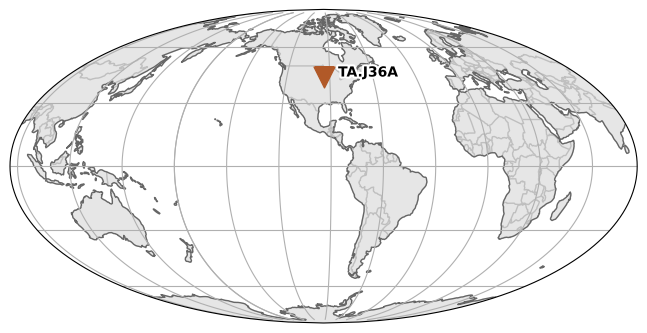

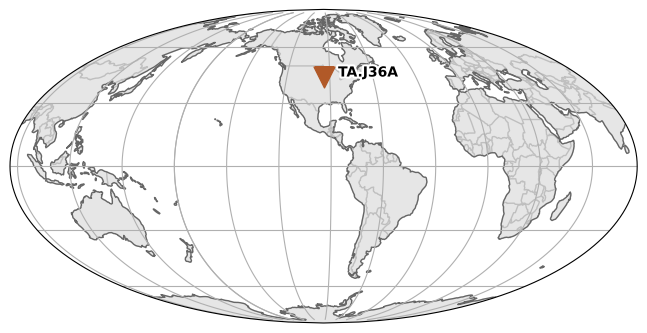

In [ ]:
#plot the location of station
inv.plot()

In [ ]:
#read a trace in the stream to get the detailed information of seismic data
st2 = ob.read("TA.J36A..BHZ__20120101T000000Z__20120102T000000Z.mseed")
st2[0].stats

         network: TA
         station: J36A
        location: 
         channel: BHZ
       starttime: 2012-01-01T00:00:00.000000Z
         endtime: 2012-01-02T00:00:57.500000Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 3458301
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 1294, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 5300224})

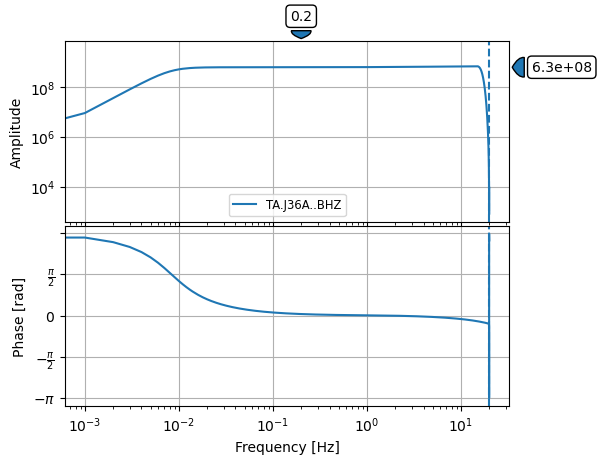

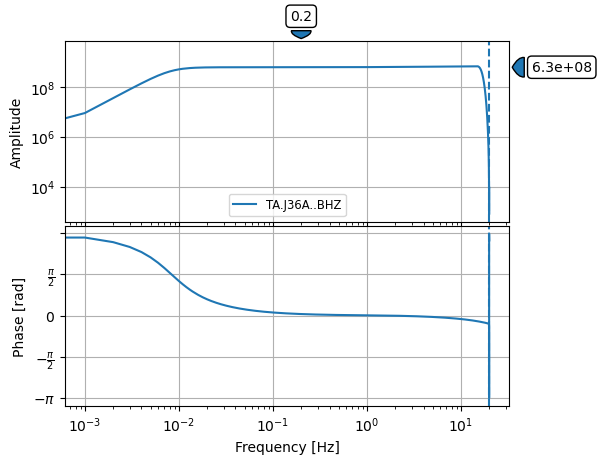

In [ ]:
#plot bode diagram 
inv.plot_response(min_freq=0.001)

Gambar di atas merupakan grafik bode yang terdiri dari dua grafik yaitu respon amplitudo dan respon fase terhadap frekuensi. Kedua besaran tersebut di plot terhadap sumbu horizontal sebanding dengan logaritma dari frekuensi. Plot ini menunjukkan seluruh rangkaian proses perekaman data termasuk proses konversi analog ke digital maupun tahapan filter digital yang mungkin terjadi.

In [ ]:
#proses-proses itu dapat dilihat dengan cara
inv[0][0][0].response

Channel Response
	From M/S (velocity in meters per second) to COUNTS (digital counts)
	Overall Sensitivity: 6.27192e+08 defined at 0.200 Hz
	3 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1495.34
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 419430
		Stage 3: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1

Terdapat tiga tahapan pada instrumen kali ini, respon akhir instrumen merupakan proses perkalian dari semua tahapan dalam domain frekuensi. Respon instrumen mendeskripsikan bagaimana data yang terekam bertransformasi menjadi data yang tersimpan dalam sebuah file sehingga untuk mendapatkan gambaran aktual getaran bawah permukaan Bumi perlu dilakukan proses inversi. Dekonvolusi respon instrumen akan mengonversi data kembali pada satuan aslinya.

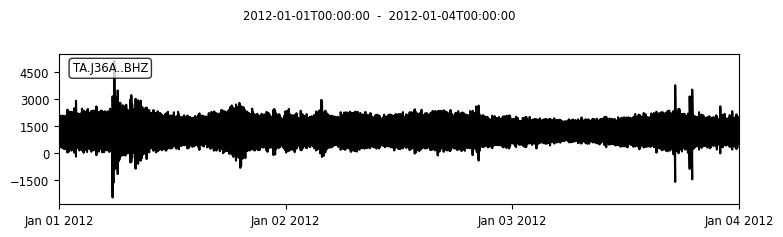

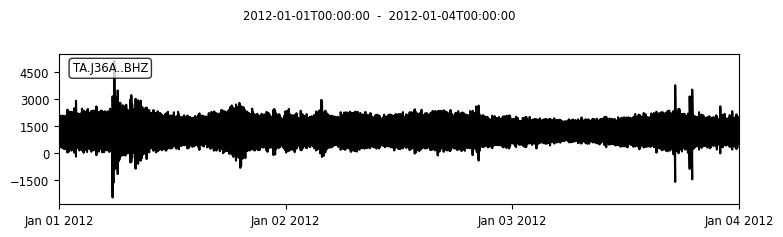

In [ ]:
#plot data hasil merged
a.plot()

# Detrend dan Trim data

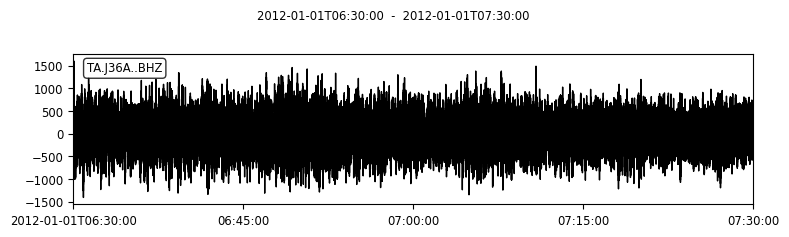

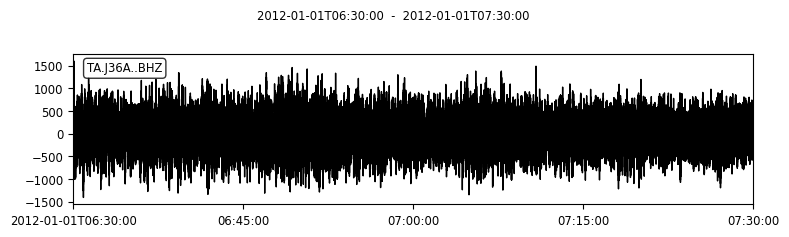

In [ ]:
#melakukan detrend dan trim pada data, langkah ini menjadi opsional bukan keharusan 
b = a.detrend("linear")
b.trim(ob.UTCDateTime("2012-01-01T06:30:00.000"),ob.UTCDateTime("2012-01-01T07:30:00.000"))
b.plot()

Koreksi respon instrumen merupan metode yang berada di objek trace dan memiliki beberapa argumen yaitu:

a. inventory, file metadata stasiun, tidak diperlukan apabila sebelumnya telah melakukan attach_response terhadap data waveform;
b. output, satuan output, berupa "DISP", "VEL", atau "ACC";
c. water_level, water level untuk proses dekonvolusi (default: 60 dB)
d. pre_filt, bandpass filter pada domain frekuensi sebelum proses dekonvolusi, berupa tuple (f1, f2, f3, f4);
e. taper, cosine taper domain waktu sebelum dekonvolusi;
f. taper_fraction, nilai cosine taper;
g. plot, menampilkan plot proses koreksi respon instrumen;

seperti hal di bawah ini:

TA.J36A..BHZ | 2012-01-01T06:30:00.000000Z - 2012-01-01T07:30:00.000000Z | 40.0 Hz, 144001 samples

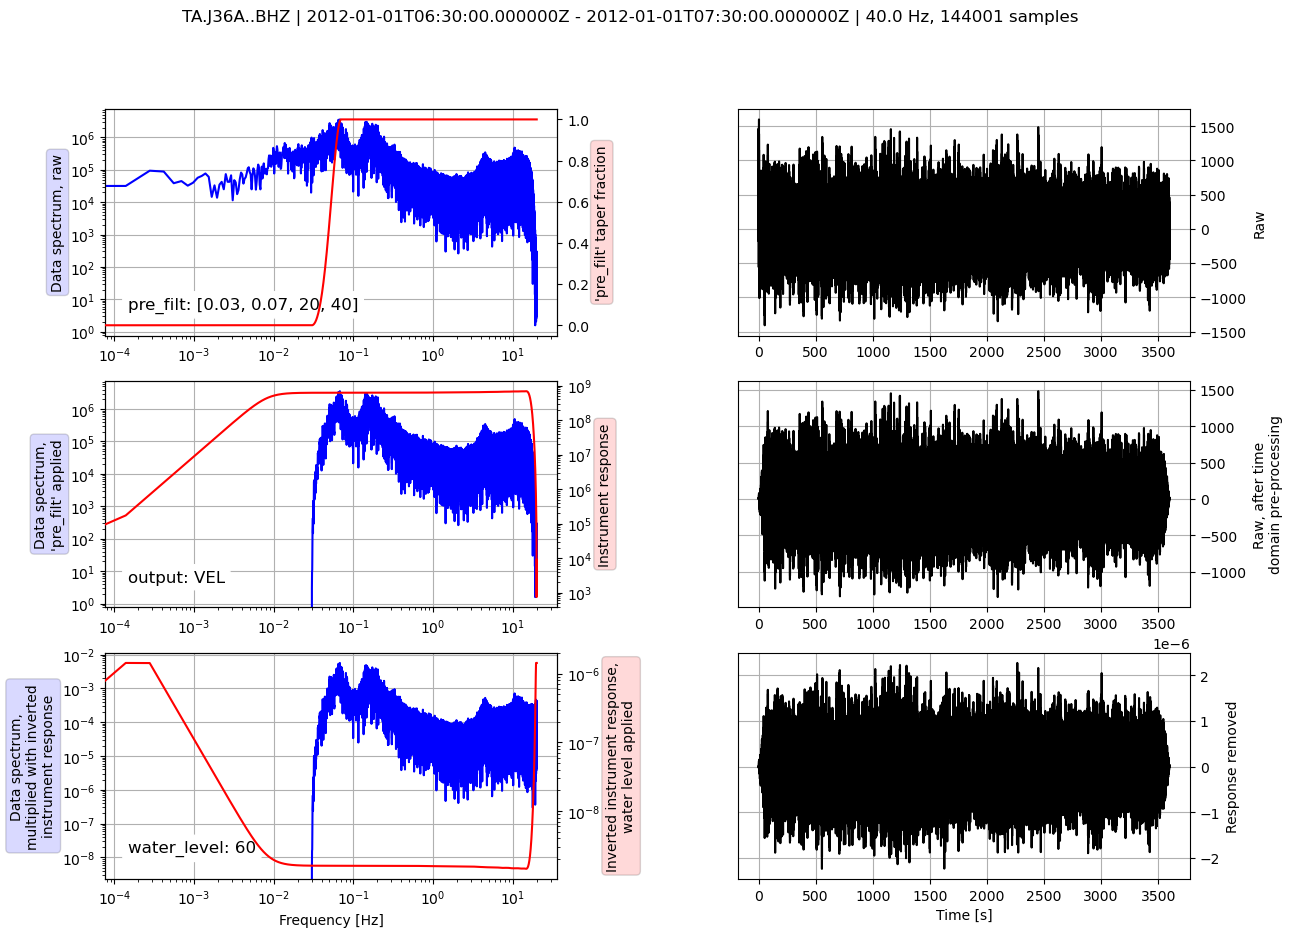

In [ ]:
#koreksi respon instrumen dengan output velocity
tr=st[0]
pre_filt = (0.03, 0.07, 20.0, 40.0)
tr.remove_response(inventory=inv, pre_filt=pre_filt, output="VEL",
                   water_level=60, plot=True)

Ketiga grafik di atas menggambarkan tampilan rekaman time series (kanan) dan domain frekuensi (kiri) dari data serta menunjukkan proses koreksi instrumen per barisnya. Baris pertama atau paling atas adalah raw data kemudian dilakukan proses pre-processing kemudian jadilah data pada baris terakhir adalah data hasil koreksi respon instrumen.

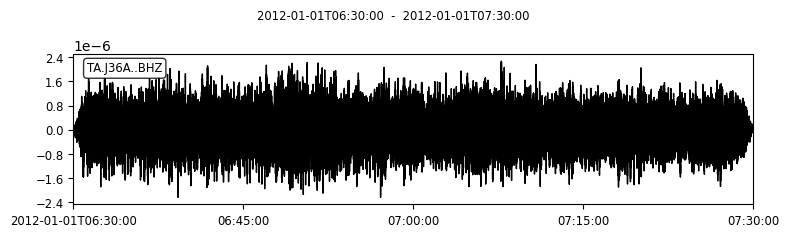

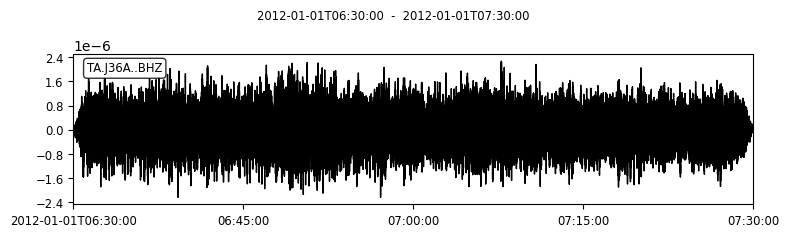

In [ ]:
#plot waveform setelah dilakukan koreksi instrumen
tr.plot()

Secara kasat mata tidak ada perbedaan dengan wavefrom sebelum dan sesudah dilakukan koreksi instrumen, namun sumbu y pada kedua plot jelas berbeda. Jika sebelumnya sumbu y menampilkan satuan digital counts maka setelah proses dekonvolusi menampilkan satuan kecepatan gelombang yang terekam dalam satuan m/s.

TA.J36A..BHZ | 2012-01-01T06:30:00.000000Z - 2012-01-01T07:30:00.000000Z | 40.0 Hz, 144001 samples

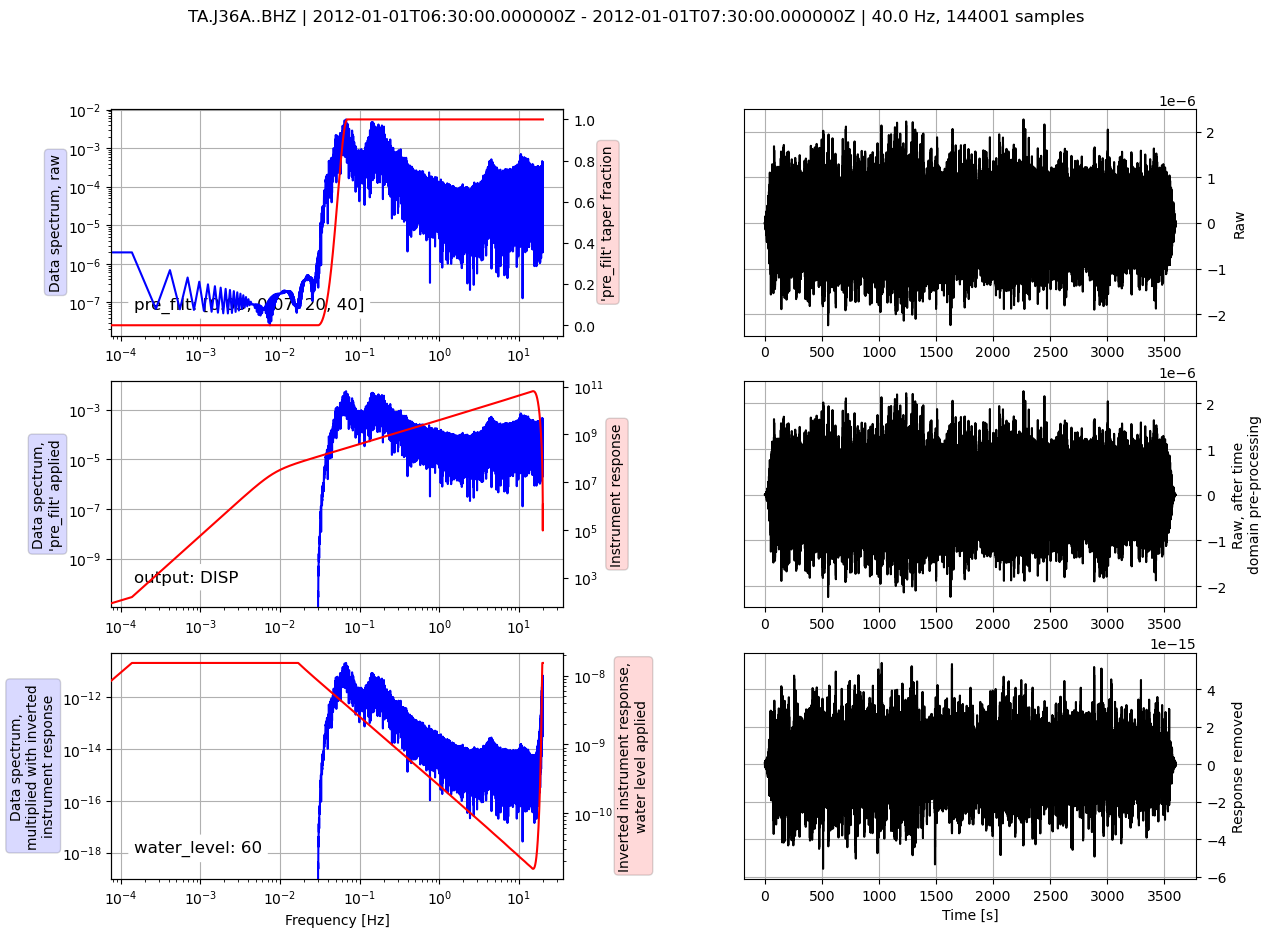

In [ ]:
#koreksi instrumen dengan output displacement
pre_filt = (0.03, 0.07, 20.0, 40.0)
tr.remove_response(inventory=inv, pre_filt=pre_filt, output="DISP",
                   water_level=60, plot=True)

# BandPass Filter

Dilakukan bandpass filter pada data agar mendapatkan frequency dinatara frequency yang akan ditentukan, showcase pada data dibawah diatur untuk bandpass antara `frequensy 4 dan 8`

In [ ]:
tr_copy= a.copy()
tr_copy.filter('bandpass', freqmin= 4, freqmax= 8)
tr_copy.plot()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft

st = tr_copy
# Konversi trace menjadi numpy array
tr = st[0]
x = tr.data
# FFT
y = fft(x)
# Hitung spektrum frekuensi
n = len(x)
f = np.linspace(0, 1/tr.stats.delta, n)
spec = 2.0/n * np.abs(y[:n//2])
# Plot spektrum frekuensi
plt.plot(f[:n//2], spec)
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Amplitudo')
plt.show()

- Data sebelum di bandpass dalam domain time

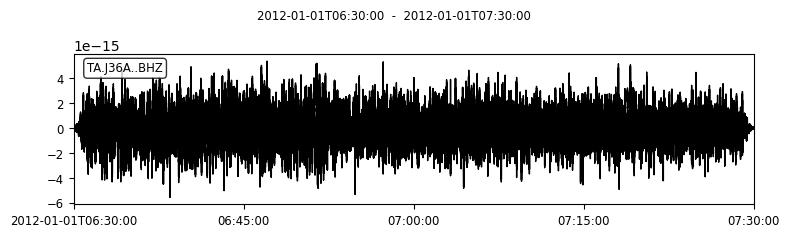

- Data sebelum di bandpass dalam domain frequency

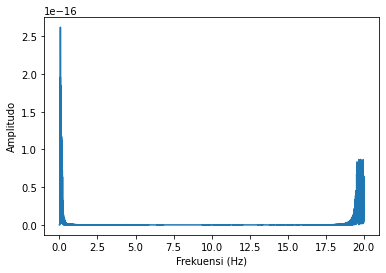

- Data setelah di bandpass dalam domain time

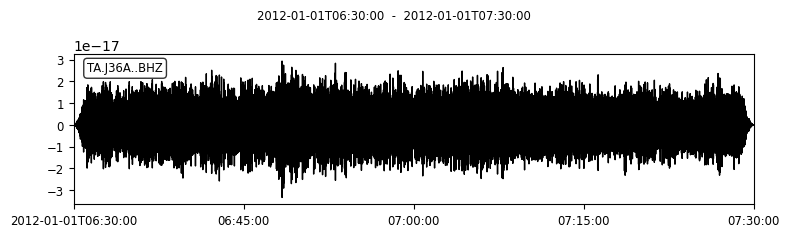

- Data setelah di bandpass dalam domain frequency

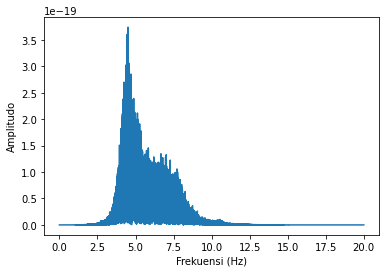

# Time Normalization (metode 1bit)

metode 1 bit msederhananya adalah mengubah semua nilai positif menjadi 1 dan juga mengubah nilai negatif menjadi -1 

In [ ]:
def norm_time (trace):
    data = trace[0].data
    ndata = np.array(list(map(lambda x: 1.0 if x >= 0 else -1.0, data)))
    trace[0].data = ndata
    trace[0].plot()

norm_time(st)

- Data sebelum melakukan Time Normalization 

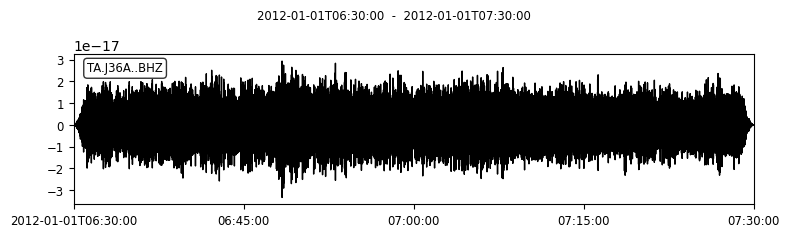

- Data setelah melakukan Time Normalization 

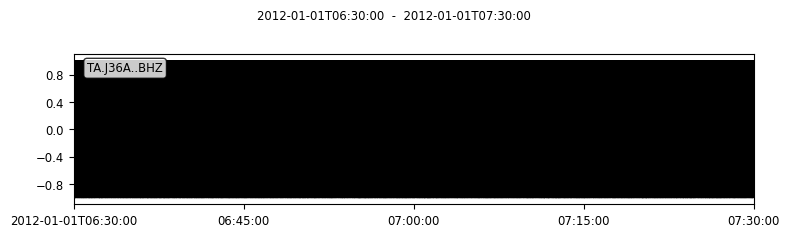

# Spectral Whitening

In [ ]:
from obspy.signal.util import next_pow_2
from scipy.fft import fft,ifft

def whiten(stream):
    data = stream[0].data
    ln = len(data)
    nfft = next_pow_2(ln)
    cdata = fft(data, nfft)
    cdata_amp = np.sqrt(abs(np.multiply(cdata, np.conjugate(cdata))))
    cdata /= cdata_amp
    rdata = np.real(ifft(cdata, nfft)[:ln])
    stream[0].data = rdata

    return stream

- sebelum dilakukan spectral whitening

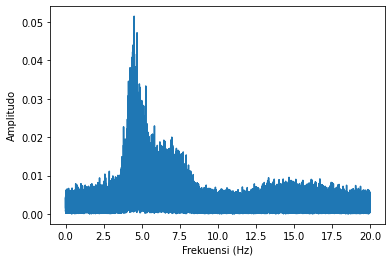

- setelah dilakukan spectral whitening 

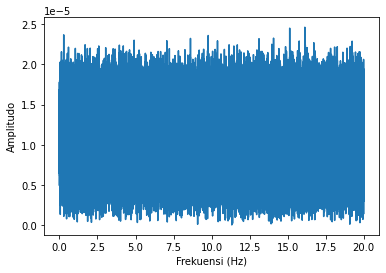

- setelah dilakukan spectral whitening (domain time)

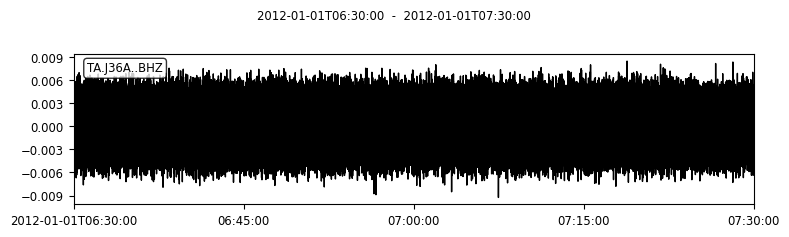